In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import itertools
import time
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score


from sklearn.feature_selection import RFE
import statsmodels.formula.api as sm

In [269]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [270]:
standard_predictors = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio']
predictors_actors = ['director_high', 'actor_1_high',  'actor_2_high', 'actor_3_high']
predictors_genre = ['action', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport', 'thriller', 'war', 'western']
logistic_model = sm.logit(formula='profit_binary ~ ' + ' + '.join(predictors_actors) + ' + ' + ' + '.join(predictors_genre) + ' + ' + ' + '.join(standard_predictors), data=train).fit()


Optimization terminated successfully.
         Current function value: 0.339561
         Iterations 7


In [271]:
#summary
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2976
Method:                           MLE   Df Model:                           28
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.5083
Time:                        15:49:03   Log-Likelihood:                -1020.4
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.1816      0.560     -3.894      0.000      -3.280      -1.084
director_high                 1.5380      0.120     12.849      0.000       1.303       1.773
actor_1_high                  0.9081      0.123      7.355      0.000       0.666       1.150
actor_2_high                  1.6683      0.119     14.008      0.000       1.435       1.902
actor_3_high                  2.3943      0.118     20.272      0.000       2.163       2.626
action                       -0.0983      0.162     -0.608      0.543      -0.415       0.219
biography                     0.0945      0.255      0.371      0.711      -0.405       0.594
comedy                       -0.1708      0.156     -1.093      0.274      -0.477       0.135
crime                         0.0825      0.158      0.522      0.602      -0.227       0.392
documentary                   2.3691      0.525      4.510      0.000       1.339       3.399
drama                         0.1489      0.142      1.045      0.296      -0.130       0.428
history                       0.1886      0.317      0.595      0.552      -0.433       0.810
horror                        0.5413      0.225      2.401      0.016       0.099       0.983
music                        -0.0037      0.311     -0.012      0.990      -0.613       0.606
musical                       0.2629      0.416      0.632      0.527      -0.552       1.078
mystery                       0.0918      0.200      0.458      0.647      -0.301       0.485
romance                       0.1083      0.144      0.754      0.451      -0.173       0.390
sport                        -0.2821      0.286     -0.986      0.324      -0.842       0.278
thriller                     -0.0823      0.160     -0.514      0.607      -0.396       0.231
war                           0.2786      0.311      0.895      0.371      -0.331       0.888
western                      -0.2646      0.491     -0.539      0.590      -1.226       0.697
duration                     -0.0072      0.003     -2.239      0.025      -0.014      -0.001
director_facebook_likes    1.797e-07   1.88e-05      0.010      0.992   -3.66e-05    3.69e-05
actor_3_facebook_likes     7.688e-06   8.02e-05      0.096      0.924      -0.000       0.000
actor_1_facebook_likes     2.279e-05    4.7e-05      0.485      0.628   -6.93e-05       0.000
cast_total_facebook_likes -2.688e-05   4.68e-05     -0.574      0.566      -0.000    6.49e-05
facenumber_in_poster         -0.0086      0.028     -0.312      0.755      -0.063       0.046
actor_2_facebook_likes     1.888e-05   4.91e-05      0.385      0.701   -7.74e-05       0.000
aspect_ratio                 -0.2209      0.213     -1.036      0.300      -0.639       0.197
=============================================================================================
"""

## Looking at confusion matrix

0.9285809050452238


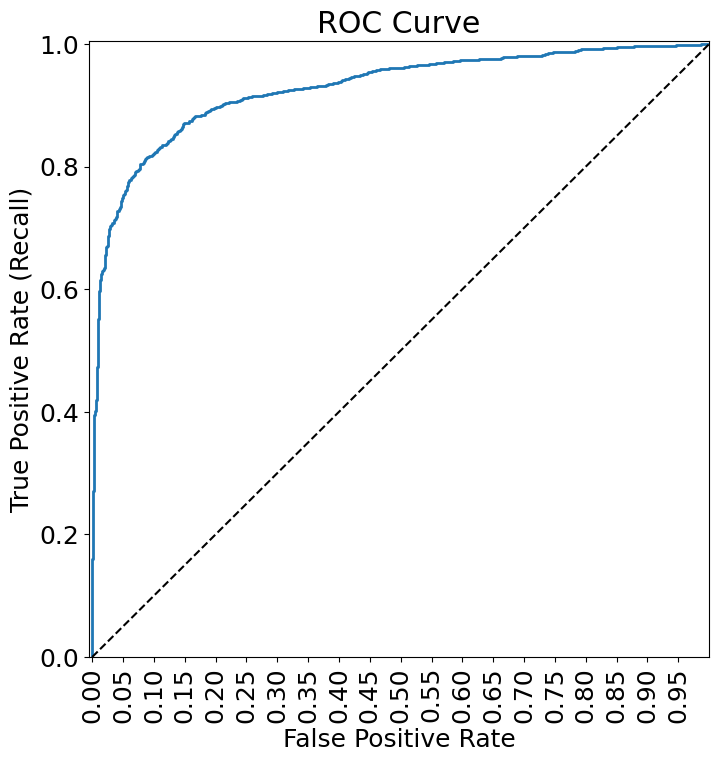

In [272]:
from sklearn.metrics import roc_curve, auc
y=train.profit_binary
ypred = logistic_model.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

In [273]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 88.4%
Precision = 88.5%
TPR or Recall = 90.4%
FNR = 9.6%
FPR = 13.9%
ROC-AUC = 93.5%


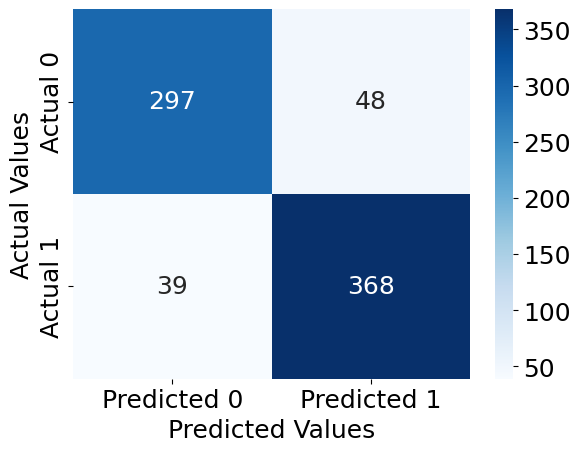

In [274]:
confusion_matrix_data(test,test.profit_binary,logistic_model,0.5)

Precision of 88.5%!

Now, we will investigate which predictors should be removed due to multicollinearity (as demonstrated in the VIF file) by attempting forward, backwards, and best subset selection.

## VIF

In [275]:
standard_predictors = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio']
predictors_actors = ['director_high', 'actor_1_high',  'actor_2_high', 'actor_3_high']
predictors_genre = ['action', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport', 'thriller', 'war', 'western']
predictor_subset = predictors_actors + predictors_genre + standard_predictors
#make X from all predictors
X = train[predictor_subset]

In [276]:
#looking at VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                      feature         VIF
0                       const   71.801215
1               director_high    1.327985
2                actor_1_high    1.377578
3                actor_2_high    1.567592
4                actor_3_high    1.639718
5                      action    1.444618
6                   biography    1.248165
7                      comedy    1.741391
8                       crime    1.236430
9                 documentary    1.074414
10                      drama    1.535821
11                    history    1.295977
12                     horror    1.332478
13                      music    1.051483
14                    musical    1.030973
15                    mystery    1.188126
16                    romance    1.179434
17                      sport    1.074692
18                   thriller    1.649509
19                        war    1.185939
20                    western    1.023754
21                   duration    1.376898
22    director_facebook_likes    1

In [277]:
print(vif_data.loc[vif_data.VIF > 10])

                      feature         VIF
0                       const   71.801215
24     actor_1_facebook_likes  228.974152
25  cast_total_facebook_likes  337.717888
27     actor_2_facebook_likes   20.674081


In [278]:
corr = train.corr()[["actor_1_facebook_likes", "cast_total_facebook_likes", "actor_2_facebook_likes"]]
corr > 0.5

,actor_1_facebook_likes,cast_total_facebook_likes,actor_2_facebook_likes
duration,False,False,False
director_facebook_likes,False,False,False
actor_3_facebook_likes,False,False,True
actor_1_facebook_likes,True,True,False
gross,False,False,False
cast_total_facebook_likes,True,True,True
facenumber_in_poster,False,False,False
budget,False,False,False
title_year,False,False,False
actor_2_facebook_likes,False,True,True


As we can see from above, cast_total_facebook_likes, actor_1_facebook_likes, and actor_2_facebook_likes suffer from multicollinearity. They are correlated. I will remove some of these variables to investigate how to reduce the multicollinearity amongst the predictiors.

In [279]:
#removing cast_total_facebook_likes
standard_predictors = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio']
predictors_actors = ['director_high', 'actor_1_high',  'actor_2_high', 'actor_3_high']
predictors_genre = ['action', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport', 'thriller', 'war', 'western']
predictor_subset = predictors_actors + predictors_genre + standard_predictors
#make X from all predictors
X = train[predictor_subset]

In [280]:
#looking at VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                    feature        VIF
0                     const  71.788253
1             director_high   1.327779
2              actor_1_high   1.376170
3              actor_2_high   1.560623
4              actor_3_high   1.639197
5                    action   1.442388
6                 biography   1.248054
7                    comedy   1.737041
8                     crime   1.236296
9               documentary   1.072105
10                    drama   1.532074
11                  history   1.295961
12                   horror   1.332420
13                    music   1.051272
14                  musical   1.030703
15                  mystery   1.188126
16                  romance   1.178943
17                    sport   1.074691
18                 thriller   1.649501
19                      war   1.184504
20                  western   1.023736
21                 duration   1.371566
22  director_facebook_likes   1.063309
23   actor_3_facebook_likes   1.429753
24   actor_1_facebook_lik

In [281]:
print(vif_data.loc[vif_data.VIF > 10])

  feature        VIF
0   const  71.788253


After removing "cast_total_facebook_likes", we observe no more multicollinearity in the data. I will be using this new subset of variables going forward.

## NEW MODEL EXCLUDING MULTICOLLINEARITY

In [282]:
logistic_model = sm.logit(formula='profit_binary ~ ' + ' + '.join(predictor_subset), data=train).fit()


Optimization terminated successfully.
         Current function value: 0.339615
         Iterations 7


In [283]:
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2977
Method:                           MLE   Df Model:                           27
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.5083
Time:                        15:49:11   Log-Likelihood:                -1020.5
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.1754      0.560     -3.883      0.000      -3.273      -1.078
director_high               1.5373      0.120     12.848      0.000       1.303       1.772
actor_1_high                0.9063      0.123      7.343      0.000       0.664       1.148
actor_2_high                1.6634      0.119     14.005      0.000       1.431       1.896
actor_3_high                2.3919      0.118     20.271      0.000       2.161       2.623
action                     -0.1009      0.162     -0.624      0.532      -0.418       0.216
biography                   0.0937      0.255      0.368      0.713      -0.405       0.593
comedy                     -0.1752      0.156     -1.123      0.262      -0.481       0.131
crime                       0.0821      0.158      0.519      0.604      -0.228       0.392
documentary                 2.3774      0.525      4.528      0.000       1.348       3.406
drama                       0.1513      0.142      1.063      0.288      -0.128       0.430
history                     0.1856      0.317      0.586      0.558      -0.435       0.806
horror                      0.5419      0.225      2.404      0.016       0.100       0.984
music                      -0.0065      0.311     -0.021      0.983      -0.616       0.603
musical                     0.2630      0.415      0.633      0.527      -0.551       1.077
mystery                     0.0912      0.200      0.455      0.649      -0.302       0.484
romance                     0.1122      0.143      0.782      0.434      -0.169       0.393
sport                      -0.2811      0.286     -0.983      0.326      -0.841       0.279
thriller                   -0.0819      0.160     -0.511      0.609      -0.396       0.232
war                         0.2858      0.310      0.920      0.357      -0.323       0.894
western                    -0.2638      0.490     -0.539      0.590      -1.223       0.696
duration                   -0.0074      0.003     -2.288      0.022      -0.014      -0.001
director_facebook_likes -2.338e-07   1.87e-05     -0.012      0.990    -3.7e-05    3.65e-05
actor_3_facebook_likes  -3.384e-05   3.31e-05     -1.023      0.306   -9.86e-05     3.1e-05
actor_1_facebook_likes  -4.093e-06   4.21e-06     -0.971      0.331   -1.24e-05    4.17e-06
facenumber_in_poster       -0.0084      0.028     -0.305      0.760      -0.062       0.046
actor_2_facebook_likes  -8.138e-06   1.42e-05     -0.575      0.565   -3.59e-05    1.96e-05
aspect_ratio               -0.2217      0.213     -1.039      0.299      -0.640       0.196
===========================================================================================
"""

0.9286294322231146


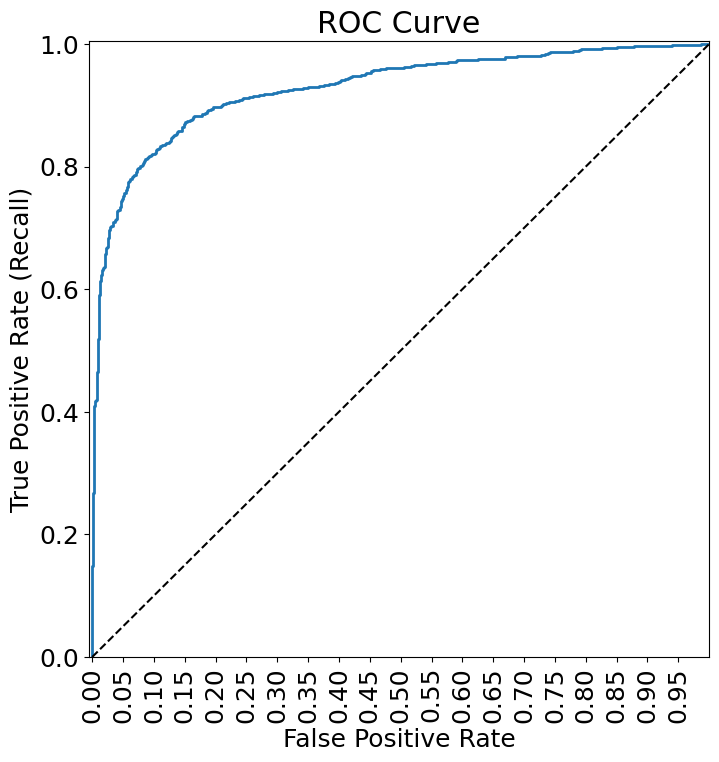

In [284]:
from sklearn.metrics import roc_curve, auc
y=train.profit_binary
ypred = logistic_model.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

In [285]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 88.4%
Precision = 88.5%
TPR or Recall = 90.4%
FNR = 9.6%
FPR = 13.9%
ROC-AUC = 93.5%


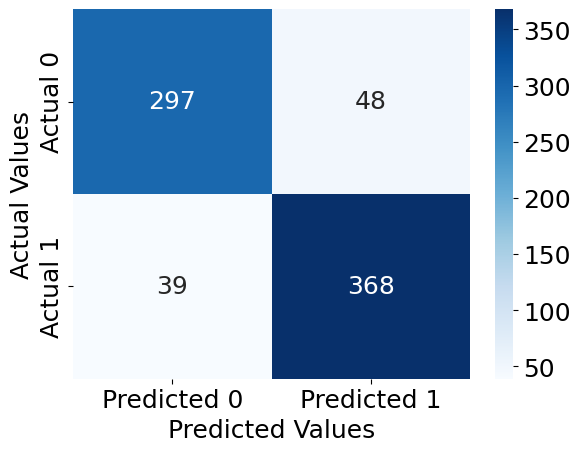

In [286]:
confusion_matrix_data(test,test.profit_binary,logistic_model,0.5)

Precision is still at 88.5% after taking into account multicollinearity.

## Looking at potential interaction terms

It might be that instead of just removing the variable, we could include interactions to remove collinearity. We will investigate whether this model has a higher precision or not.

In [287]:
standard_predictors = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio']
logistic_model = sm.logit(formula='profit_binary ~ ' + ' + '.join(predictors_actors) + ' + ' + ' + '.join(predictors_genre) + ' + ' + ' + '.join(standard_predictors)  + '+actor_1_facebook_likes*cast_total_facebook_likes+cast_total_facebook_likes*actor_2_facebook_likes', data=train).fit()
logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.335988
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2974
Method:                           MLE   Df Model:                           30
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.5135
Time:                        15:49:16   Log-Likelihood:                -1009.6
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           -2.3043      0.533     -4.320      0.000      -3.350      -1.259
director_high                                        1.5457      0.121     12.817      0.000       1.309       1.782
actor_1_high                                         1.0422      0.128      8.165      0.000       0.792       1.292
actor_2_high                                         1.6884      0.120     14.036      0.000       1.453       1.924
actor_3_high                                         2.3971      0.119     20.156      0.000       2.164       2.630
action                                              -0.1138      0.163     -0.700      0.484      -0.432       0.205
biography                                            0.1400      0.256      0.548      0.584      -0.361       0.641
comedy                                              -0.2106      0.157     -1.343      0.179      -0.518       0.097
crime                                                0.0818      0.159      0.516      0.606      -0.229       0.393
documentary                                          2.2619      0.526      4.302      0.000       1.231       3.293
drama                                                0.1540      0.143      1.075      0.282      -0.127       0.435
history                                              0.1199      0.318      0.377      0.706      -0.503       0.743
horror                                               0.4877      0.227      2.146      0.032       0.042       0.933
music                                               -0.0461      0.314     -0.147      0.883      -0.662       0.569
musical                                              0.1712      0.420      0.407      0.684      -0.653       0.995
mystery                                              0.1040      0.201      0.517      0.605      -0.290       0.498
romance                                              0.1068      0.144      0.740      0.459      -0.176       0.389
sport                                               -0.2881      0.289     -0.998      0.318      -0.854       0.278
thriller                                            -0.0544      0.161     -0.338      0.735      -0.370       0.261
war                                                  0.2858      0.313      0.913      0.361      -0.328       0.900
western                                             -0.1772      0.500     -0.354      0.723      -1.158       0.804
duration                                            -0.0065      0.003     -1.995      0.046      -0.013      -0.000
director_facebook_likes                            5.79e-06   1.91e-05      0.303      0.762   -3.16e-05    4.32e-05
actor_3_facebook_likes                           -2.108e-05   8.37e-05     -0.252      0.801      -0.000       0.000
actor_1_facebook_likes                           -1.627e-05   5.13e-05     -0.317 

Classification accuracy = 87.1%
Precision = 87.6%
TPR or Recall = 88.7%
FNR = 11.3%
FPR = 14.8%
ROC-AUC = 93.6%


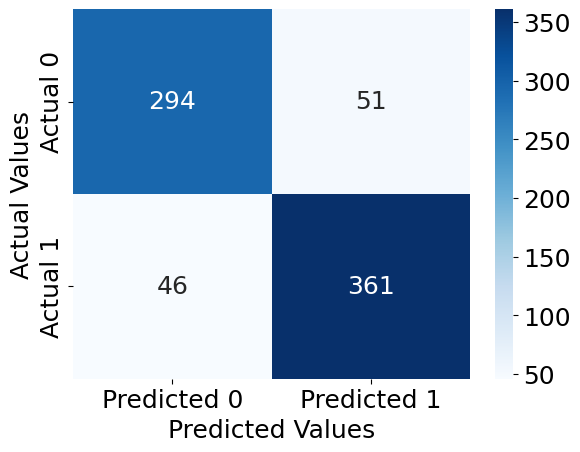

In [288]:
confusion_matrix_data(test,test.profit_binary,logistic_model,0.5)

As we can see, this actually reduces precision (from 88.5 to 87.6), so we did not include these interaction terms. 

## FORWARD SELECTION

In [289]:
#make X from all predictors
X = train[predictor_subset]
X.columns

Index(['director_high', 'actor_1_high', 'actor_2_high', 'actor_3_high',
       'action', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport',
       'thriller', 'war', 'western', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes',
       'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio'],
      dtype='object')

In [290]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(1, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Log likelihood')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(1, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [291]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('profit_binary~' + '+'.join(predictor_subset),data = train).fit(disp=0)
    Rsquared = model.llf
    return {"model":model, "Rsquared":Rsquared}

In [292]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:        
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [293]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [294]:
models_best = forward_selection()

Processed  27 models on 1 predictors in 1.11961030960083 seconds.
Processed  26 models on 2 predictors in 1.303304672241211 seconds.
Processed  25 models on 3 predictors in 1.2011125087738037 seconds.
Processed  24 models on 4 predictors in 1.7620854377746582 seconds.
Processed  23 models on 5 predictors in 2.2006895542144775 seconds.
Processed  22 models on 6 predictors in 1.7149465084075928 seconds.
Processed  21 models on 7 predictors in 2.044827461242676 seconds.
Processed  20 models on 8 predictors in 1.7910239696502686 seconds.
Processed  19 models on 9 predictors in 1.8718485832214355 seconds.
Processed  18 models on 10 predictors in 1.30411696434021 seconds.
Processed  17 models on 11 predictors in 1.086867094039917 seconds.
Processed  16 models on 12 predictors in 1.3353931903839111 seconds.
Processed  15 models on 13 predictors in 1.2497353553771973 seconds.
Processed  14 models on 14 predictors in 1.4070444107055664 seconds.
Processed  13 models on 15 predictors in 1.4889729

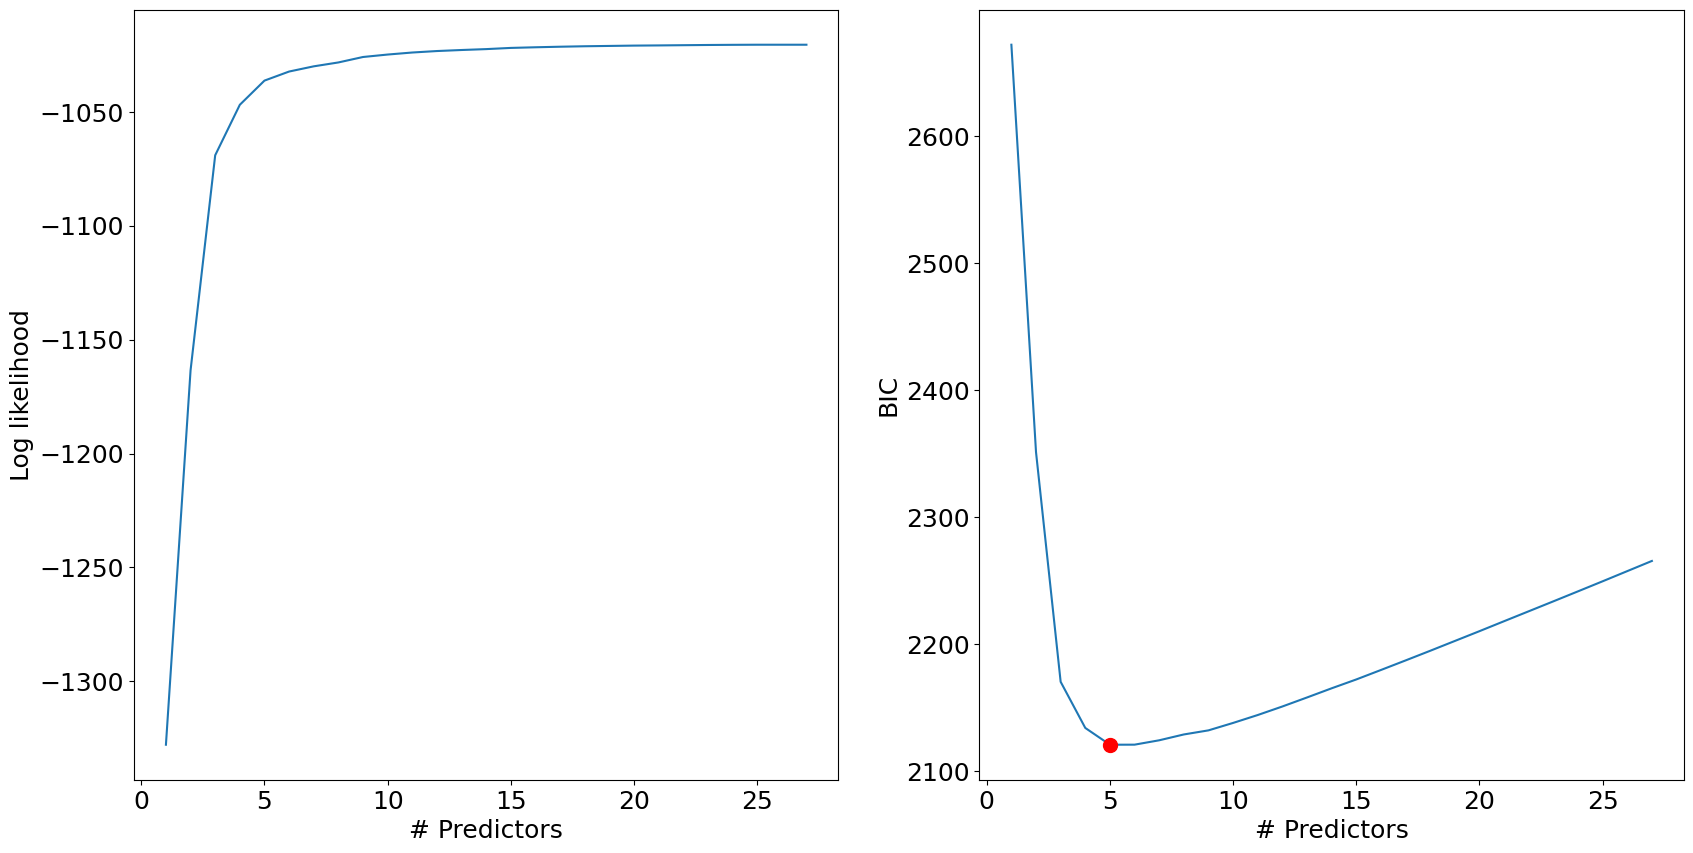

In [295]:
best_sub_plots()

In [296]:
best_fwd_reg_model = models_best['model'][5]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2999
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.5007
Time:                        15:50:02   Log-Likelihood:                -1036.3
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.3618      0.132    -25.408      0.000      -3.621      -3.102
actor_3_high      2.3449      0.114     20.482      0.000       2.120       2.569
actor_2_high      1.6181      0.116     13.927      0.000       1.390       1.846
director_high     1.5056      0.117     12.891      0.000       1.277       1.735
actor_1_high      0.8220      0.119      6.892      0.000       0.588       1.056
documentary       2.4966      0.488      5.116      0.000       1.540       3.453
=================================================================================
"""

Classification accuracy = 88.0%
Precision = 88.2%
TPR or Recall = 89.9%
FNR = 10.1%
FPR = 14.2%
ROC-AUC = 93.2%


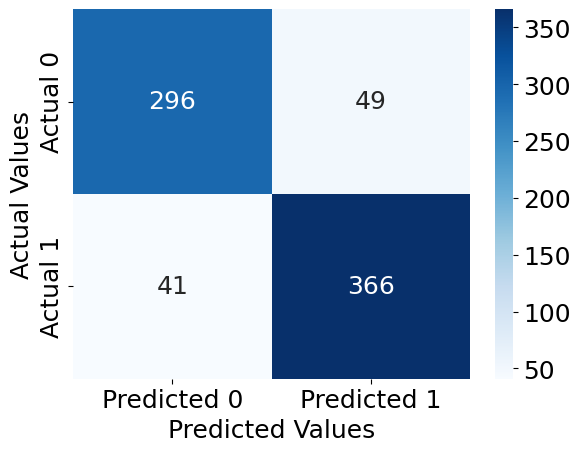

In [297]:
confusion_matrix_data(test,test.profit_binary,best_fwd_reg_model,0.5)

Precision went down from 88.5% to 88.2%, so it might be that forward selection is not the best model to optimize precision. 

## BACKWARDS

In [298]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [299]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [300]:
models_best = backward_selection()


Processed  27 models on 26 predictors in 6.58602499961853 seconds.
Processed  26 models on 25 predictors in 5.827258586883545 seconds.
Processed  25 models on 24 predictors in 5.985774040222168 seconds.
Processed  24 models on 23 predictors in 3.6672017574310303 seconds.
Processed  23 models on 22 predictors in 4.890745401382446 seconds.
Processed  22 models on 21 predictors in 4.7265305519104 seconds.
Processed  21 models on 20 predictors in 4.555574893951416 seconds.
Processed  20 models on 19 predictors in 3.583608627319336 seconds.
Processed  19 models on 18 predictors in 4.989135026931763 seconds.
Processed  18 models on 17 predictors in 2.560185194015503 seconds.
Processed  17 models on 16 predictors in 2.442878246307373 seconds.
Processed  16 models on 15 predictors in 1.3048787117004395 seconds.
Processed  15 models on 14 predictors in 1.1763503551483154 seconds.
Processed  14 models on 13 predictors in 1.4665946960449219 seconds.
Processed  13 models on 12 predictors in 0.9810

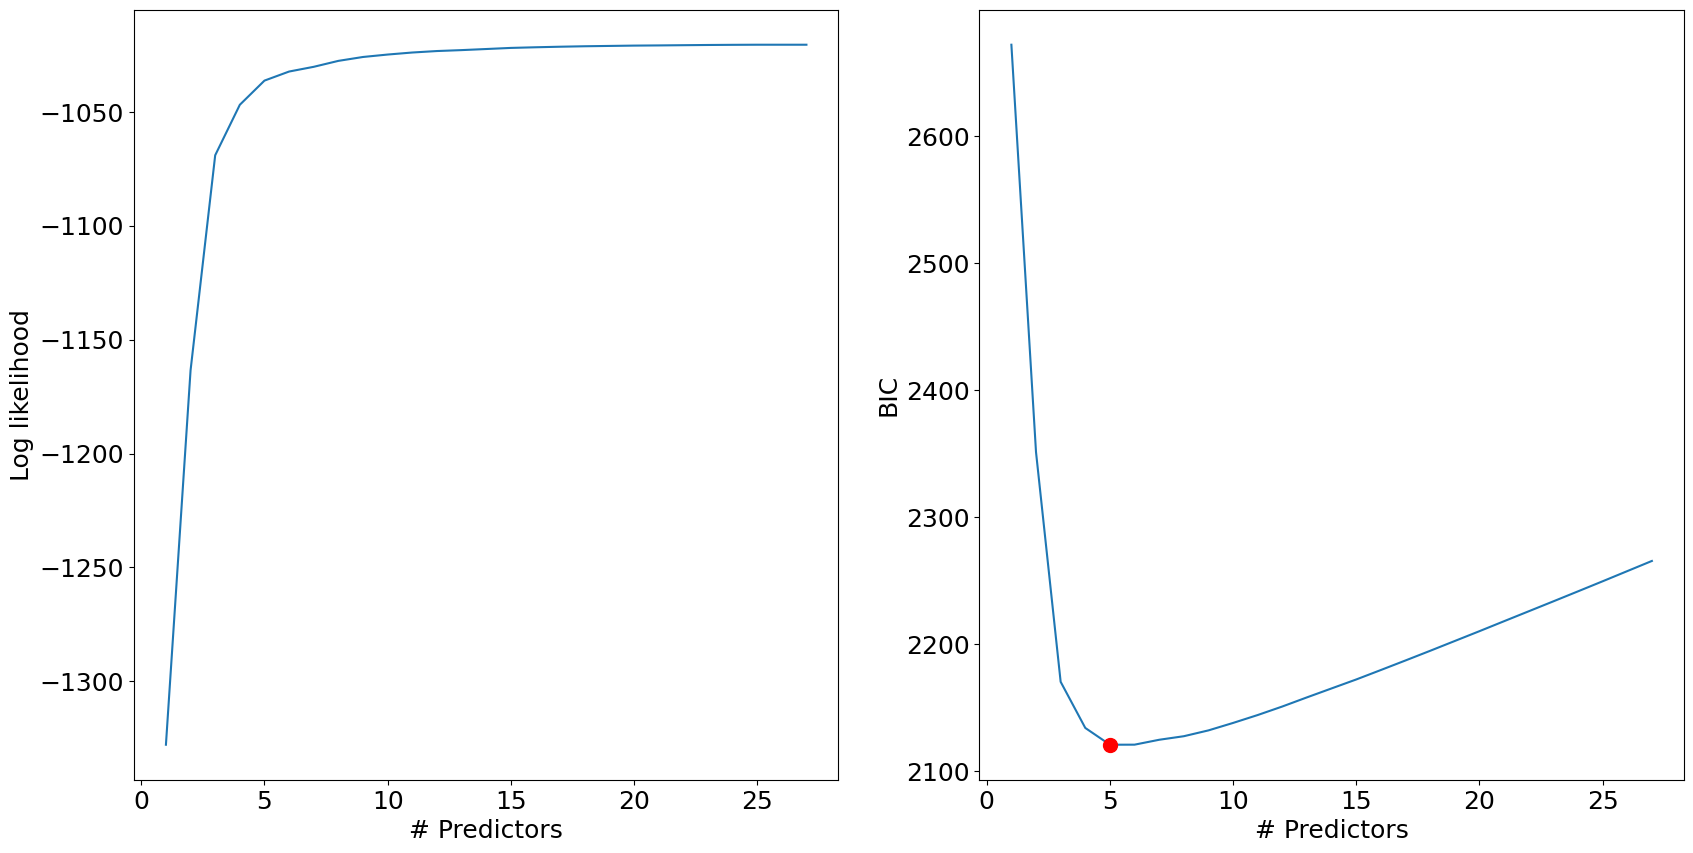

In [301]:
best_sub_plots()

In [302]:
best_bwd_reg_model = models_best['model'][5]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2999
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.5007
Time:                        15:51:11   Log-Likelihood:                -1036.3
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.3618      0.132    -25.408      0.000      -3.621      -3.102
director_high     1.5056      0.117     12.891      0.000       1.277       1.735
actor_1_high      0.8220      0.119      6.892      0.000       0.588       1.056
actor_2_high      1.6181      0.116     13.927      0.000       1.390       1.846
actor_3_high      2.3449      0.114     20.482      0.000       2.120       2.569
documentary       2.4966      0.488      5.116      0.000       1.540       3.453
=================================================================================
"""

Classification accuracy = 88.0%
Precision = 88.2%
TPR or Recall = 89.9%
FNR = 10.1%
FPR = 14.2%
ROC-AUC = 93.2%


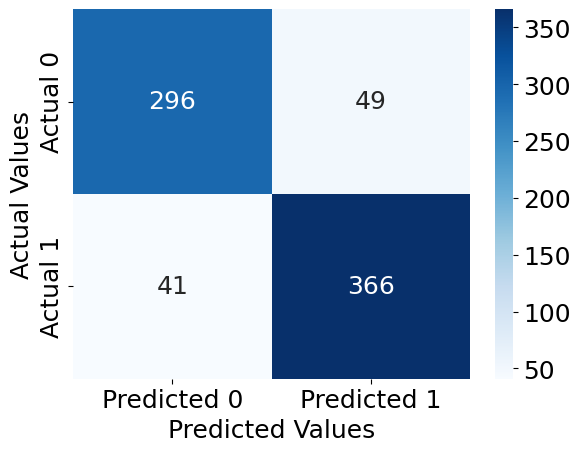

In [303]:
confusion_matrix_data(test,test.profit_binary,best_bwd_reg_model,0.5)

Precision went down from 88.5% to 88.2%, so it might be that backwards selection is not the best model to optimize precision.

## BEST SUBSET SELECTION

In [304]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [305]:
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
#models_best = pd.DataFrame(columns=["Rsquared", "model"])

#tic = time.time()
#for i in range(1,1+X.shape[1]):
#    models_best.loc[i] = getBest_model(i)

#toc = time.time()
#print("Total elapsed time:", (toc-tic), "seconds.")

The code took way to long to run, so we decided against it.

## PROBLEM: 
The cast profitability variables might pose a problem as creating them was based on average profit of each variable. Due to the fact that only half the actors's names showed up more than once, then the actor names might just be a reflection of profit in different scenarios. This might be a worry since the addition of this variables raised the model from around 50% to 90% precision when predicting whether a movie was profitable or not. In order to investigate this hypothesis, we sought to remake the model without the cast profitability variables.

In [306]:
logistic_model = sm.logit(formula='profit_binary ~ ' + ' +  '.join(predictors_genre) + ' + ' + ' + '.join(standard_predictors), data=train).fit()


Optimization terminated successfully.
         Current function value: 0.667957
         Iterations 6


In [307]:
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2980
Method:                           MLE   Df Model:                           24
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                 0.03283
Time:                        15:51:18   Log-Likelihood:                -2007.2
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                 1.117e-17
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.5224      0.368      1.421      0.155      -0.198       1.243
action                       -0.1911      0.104     -1.829      0.067      -0.396       0.014
biography                    -0.0582      0.171     -0.340      0.734      -0.393       0.277
comedy                        0.1845      0.101      1.832      0.067      -0.013       0.382
crime                        -0.1140      0.106     -1.080      0.280      -0.321       0.093
documentary                   0.8122      0.363      2.237      0.025       0.100       1.524
drama                        -0.2505      0.092     -2.712      0.007      -0.431      -0.069
history                      -0.3141      0.218     -1.438      0.151      -0.742       0.114
horror                        0.4842      0.143      3.379      0.001       0.203       0.765
music                         0.2317      0.196      1.181      0.237      -0.153       0.616
musical                       0.0547      0.237      0.231      0.818      -0.410       0.520
mystery                       0.0277      0.133      0.208      0.835      -0.233       0.289
romance                       0.0777      0.096      0.810      0.418      -0.110       0.266
sport                         0.0587      0.199      0.296      0.767      -0.330       0.448
thriller                     -0.0256      0.105     -0.244      0.807      -0.231       0.180
war                          -0.4125      0.207     -1.988      0.047      -0.819      -0.006
western                      -0.5584      0.341     -1.638      0.101      -1.227       0.110
duration                      0.0046      0.002      2.351      0.019       0.001       0.009
director_facebook_likes    4.251e-05   1.38e-05      3.071      0.002    1.54e-05    6.96e-05
actor_3_facebook_likes       -0.0003   6.56e-05     -3.865      0.000      -0.000      -0.000
actor_1_facebook_likes       -0.0002    4.5e-05     -4.564      0.000      -0.000      -0.000
cast_total_facebook_likes     0.0002   4.49e-05      4.569      0.000       0.000       0.000
facenumber_in_poster         -0.0078      0.018     -0.425      0.671      -0.044       0.028
actor_2_facebook_likes       -0.0002   4.76e-05     -3.958      0.000      -0.000   -9.51e-05
aspect_ratio                 -0.4840      0.147     -3.282      0.001      -0.773      -0.195
=============================================================================================
"""

0.6318176232901961


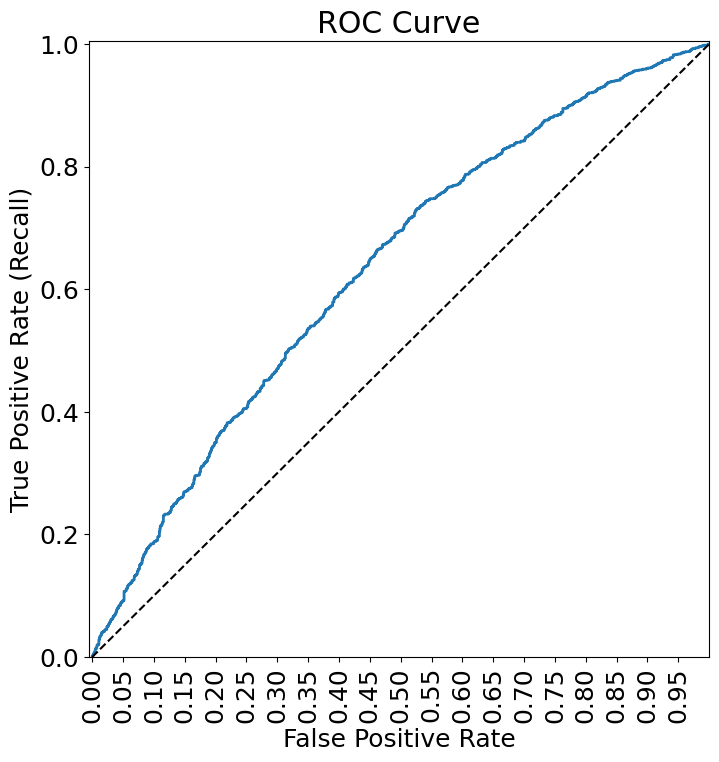

In [308]:
from sklearn.metrics import roc_curve, auc
y=train.profit_binary
ypred = logistic_model.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

Classification accuracy = 59.2%
Precision = 61.0%
TPR or Recall = 68.1%
FNR = 31.9%
FPR = 51.3%
ROC-AUC = 61.3%


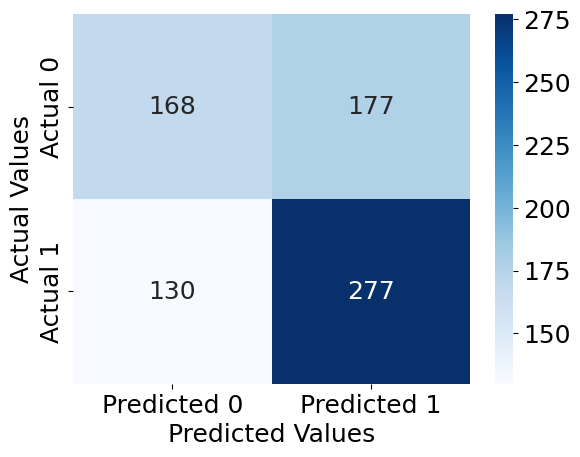

In [309]:
confusion_matrix_data(test,test.profit_binary,logistic_model,0.5)

As we can see, when we remove the variables for the profitability of the cast, the precision of the model only increases slightly. This made us worry about the validity of using the variable.

We further investigated how we could improve the model by aplying all the model transformations we had previously used (fwd, bwd, best, lasso, ridge).

## FORWARD SELECTION

In [310]:
predictor_subset = predictors_genre + standard_predictors
#make X from all predictors
X = train[predictor_subset]
X.columns

Index(['action', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sport',
       'thriller', 'war', 'western', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes',
       'cast_total_facebook_likes', 'facenumber_in_poster',
       'actor_2_facebook_likes', 'aspect_ratio'],
      dtype='object')

In [311]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(1, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Log likelihood')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(1, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [312]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('profit_binary~' + '+'.join(predictor_subset),data = train).fit(disp=0)
    Rsquared = model.llf
    return {"model":model, "Rsquared":Rsquared}

In [313]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:        
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [314]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [315]:
models_best = forward_selection()

Processed  24 models on 1 predictors in 0.7736778259277344 seconds.
Processed  23 models on 2 predictors in 0.5986931324005127 seconds.
Processed  22 models on 3 predictors in 0.81268310546875 seconds.
Processed  21 models on 4 predictors in 0.7039759159088135 seconds.
Processed  20 models on 5 predictors in 0.6797709465026855 seconds.
Processed  19 models on 6 predictors in 0.6374082565307617 seconds.
Processed  18 models on 7 predictors in 0.6602215766906738 seconds.
Processed  17 models on 8 predictors in 0.46598076820373535 seconds.
Processed  16 models on 9 predictors in 3.936314582824707 seconds.
Processed  15 models on 10 predictors in 0.534358024597168 seconds.
Processed  14 models on 11 predictors in 0.5579466819763184 seconds.
Processed  13 models on 12 predictors in 0.5553369522094727 seconds.
Processed  12 models on 13 predictors in 0.5145759582519531 seconds.
Processed  11 models on 14 predictors in 0.5705833435058594 seconds.
Processed  10 models on 15 predictors in 0.513

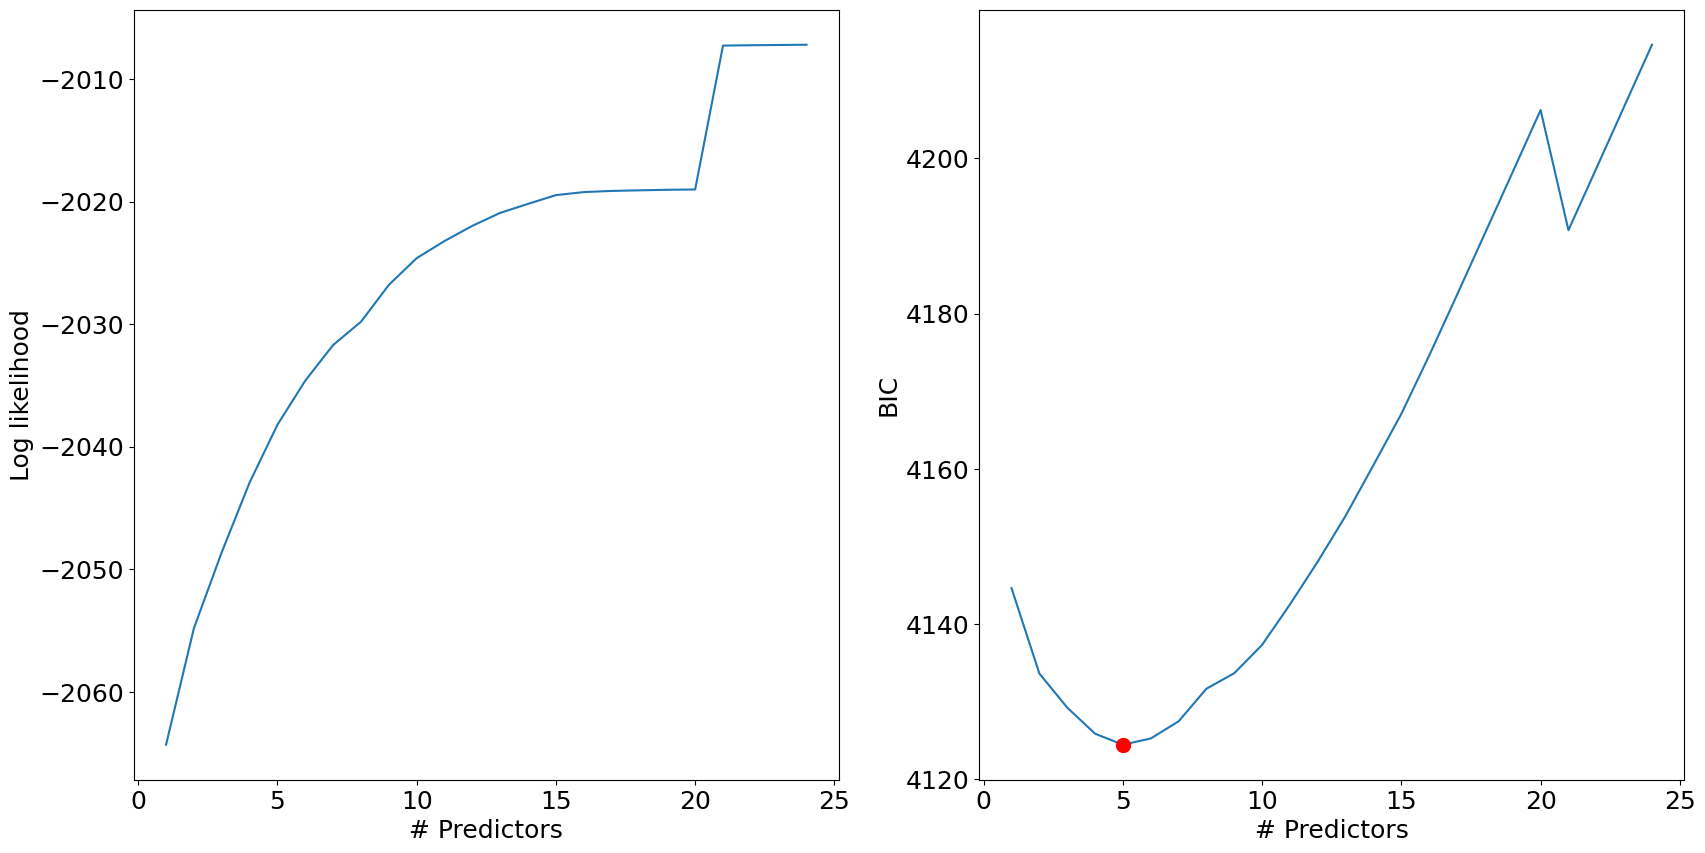

In [316]:
best_sub_plots()

In [317]:
best_fwd_reg_model = models_best['model'][5]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2999
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                 0.01790
Time:                        15:51:40   Log-Likelihood:                -2038.2
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                 1.313e-14
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.4081      0.294      4.784      0.000       0.831       1.985
drama                      -0.4305      0.077     -5.556      0.000      -0.582      -0.279
aspect_ratio               -0.4990      0.141     -3.530      0.000      -0.776      -0.222
director_facebook_likes   4.12e-05   1.34e-05      3.077      0.002     1.5e-05    6.74e-05
action                     -0.3253      0.092     -3.536      0.000      -0.506      -0.145
actor_2_facebook_likes    2.81e-05   9.63e-06      2.919      0.004    9.23e-06     4.7e-05
===========================================================================================
"""

As we can see, different variables were selected in this case compared to the initial model. 

Classification accuracy = 57.2%
Precision = 58.8%
TPR or Recall = 69.5%
FNR = 30.5%
FPR = 57.4%
ROC-AUC = 58.9%


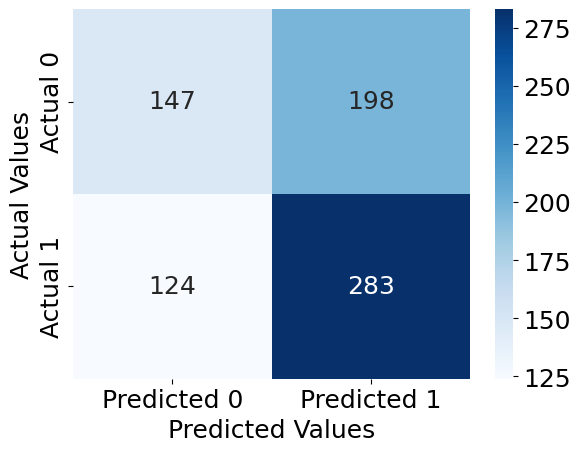

In [318]:
confusion_matrix_data(test,test.profit_binary,best_fwd_reg_model,0.5)

Again, precision does not increase when using forward selection.

## BACKWARDS

In [319]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [320]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [321]:
models_best = backward_selection()


Processed  24 models on 23 predictors in 1.926454782485962 seconds.
Processed  23 models on 22 predictors in 1.693464756011963 seconds.
Processed  22 models on 21 predictors in 1.512319803237915 seconds.
Processed  21 models on 20 predictors in 1.3443336486816406 seconds.
Processed  20 models on 19 predictors in 1.1276602745056152 seconds.
Processed  19 models on 18 predictors in 1.225127935409546 seconds.
Processed  18 models on 17 predictors in 0.9957926273345947 seconds.
Processed  17 models on 16 predictors in 0.8826913833618164 seconds.
Processed  16 models on 15 predictors in 0.8254866600036621 seconds.
Processed  15 models on 14 predictors in 0.796818733215332 seconds.
Processed  14 models on 13 predictors in 0.7370584011077881 seconds.
Processed  13 models on 12 predictors in 0.6346096992492676 seconds.
Processed  12 models on 11 predictors in 0.5389728546142578 seconds.
Processed  11 models on 10 predictors in 0.40590620040893555 seconds.
Processed  10 models on 9 predictors i

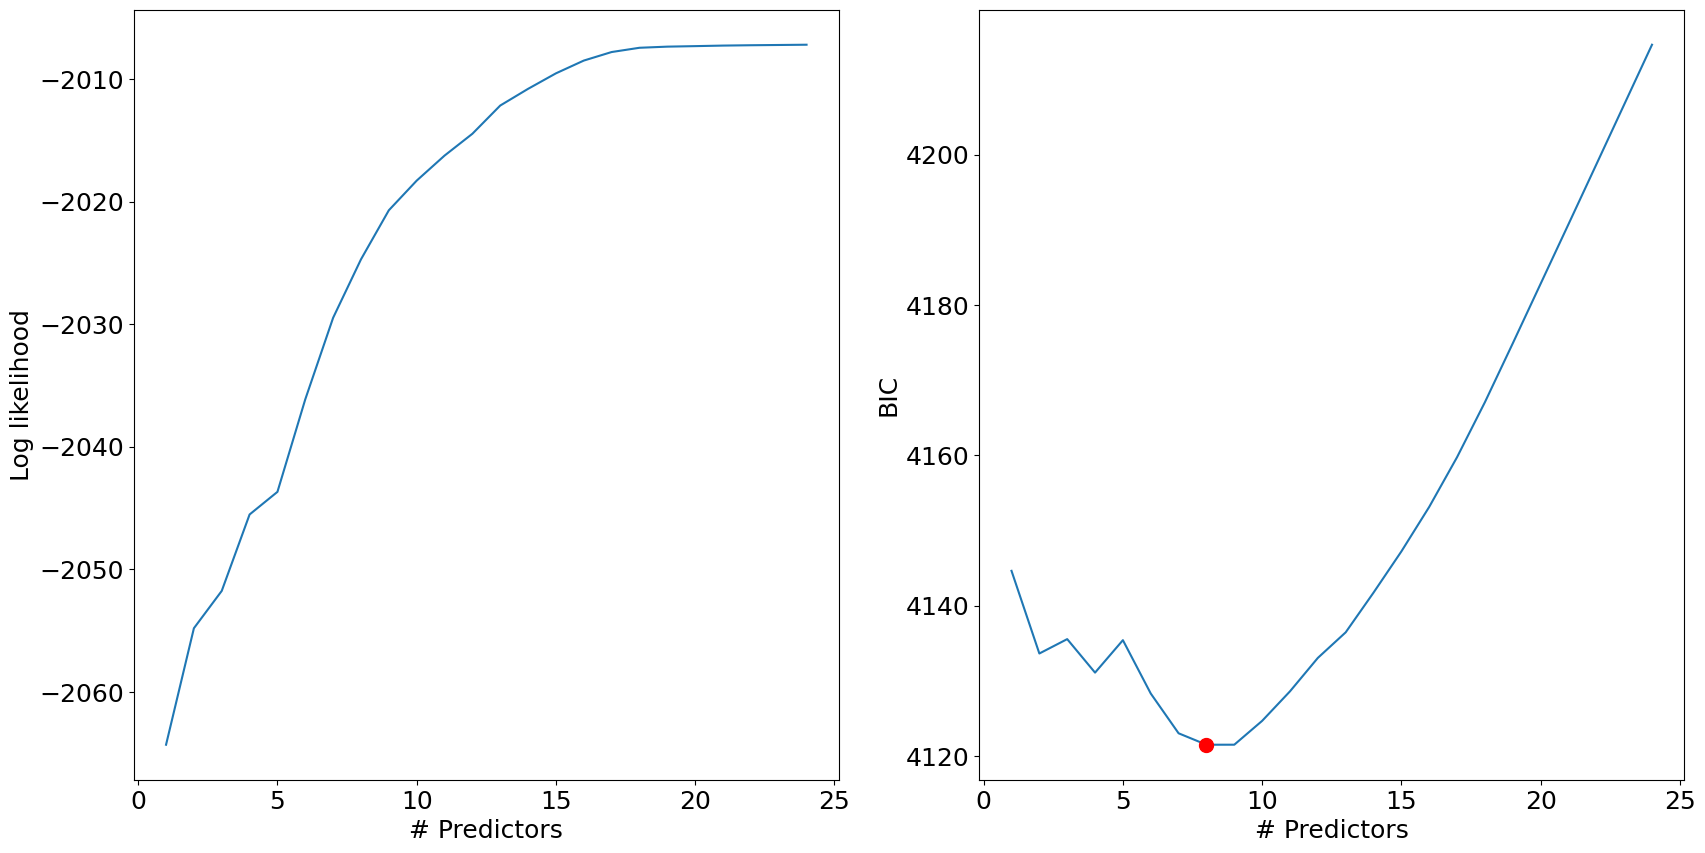

In [322]:
best_sub_plots()

In [323]:
best_bwd_reg_model = models_best['model'][8]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2996
Method:                           MLE   Df Model:                            8
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                 0.02440
Time:                        15:51:58   Log-Likelihood:                -2024.7
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                 2.350e-18
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.3075      0.296      4.413      0.000       0.727       1.888
action                       -0.3349      0.092     -3.623      0.000      -0.516      -0.154
drama                        -0.3921      0.078     -5.016      0.000      -0.545      -0.239
director_facebook_likes    4.072e-05   1.35e-05      3.012      0.003    1.42e-05    6.72e-05
actor_3_facebook_likes       -0.0003   6.47e-05     -3.953      0.000      -0.000      -0.000
actor_1_facebook_likes       -0.0002   4.43e-05     -4.717      0.000      -0.000      -0.000
cast_total_facebook_likes     0.0002   4.42e-05      4.712      0.000       0.000       0.000
actor_2_facebook_likes       -0.0002   4.67e-05     -4.138      0.000      -0.000      -0.000
aspect_ratio                 -0.5190      0.142     -3.651      0.000      -0.798      -0.240
=============================================================================================
"""

Classification accuracy = 57.8%
Precision = 60.1%
TPR or Recall = 65.6%
FNR = 34.4%
FPR = 51.3%
ROC-AUC = 58.6%


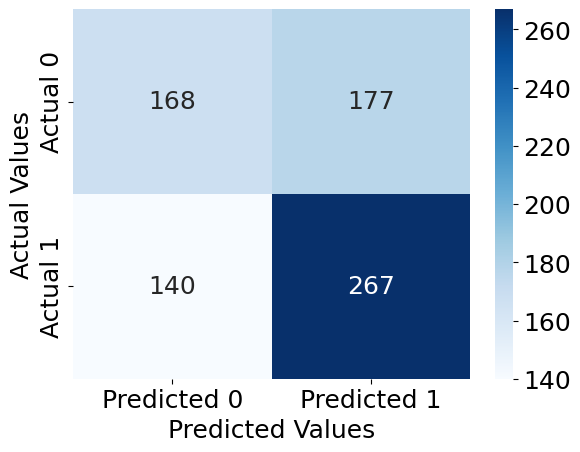

In [324]:
confusion_matrix_data(test,test.profit_binary,best_bwd_reg_model,0.5)

In this case, backwards selection did lead to a better precision from 57.2% to 60.1%. The variables selected are action, drama, the facebook likes variables, and aspect_ratio. On another hand, one might expect multicollinearity amonst the facebook like variables. We investigated VIF for this model to further investigate this:

## VIF

In [325]:
X = train[["action", "drama", "aspect_ratio", "cast_total_facebook_likes", "director_facebook_likes", "actor_3_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes"]]

In [326]:
#looking at VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                     feature         VIF
0                      const   34.389570
1                     action    1.113582
2                      drama    1.085149
3               aspect_ratio    1.038277
4  cast_total_facebook_likes  328.381521
5    director_facebook_likes    1.022344
6     actor_3_facebook_likes    8.347687
7     actor_1_facebook_likes  222.973338
8     actor_2_facebook_likes   20.223639


As we can see, there is high multicollinearity for cast_total_facebook_likes and actor_1_facebook_likes. I will remove each one of these varibales to investigate how that changes the muticollinerity in the model.  

In [327]:
X = train[["action", "drama", "aspect_ratio", "cast_total_facebook_likes", "director_facebook_likes", "actor_3_facebook_likes", "actor_2_facebook_likes"]]

In [328]:
#looking at VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                     feature        VIF
0                      const  34.137421
1                     action   1.112161
2                      drama   1.079577
3               aspect_ratio   1.038270
4  cast_total_facebook_likes   1.733860
5    director_facebook_likes   1.021301
6     actor_3_facebook_likes   1.451828
7     actor_2_facebook_likes   1.878275


There is no longer any multicollinearity in amongst the variables. 

In [329]:
X = train[["action", "drama", "aspect_ratio", "director_facebook_likes", "actor_3_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes"]]

In [330]:
#looking at VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                   feature        VIF
0                    const  34.126051
1                   action   1.111994
2                    drama   1.079784
3             aspect_ratio   1.038257
4  director_facebook_likes   1.021092
5   actor_3_facebook_likes   1.396108
6   actor_1_facebook_likes   1.177303
7   actor_2_facebook_likes   1.542478


Removing either variables reduces the muticollinearity amongst the predictors. I will run the model once again without "cast_total_facebook_likes" (VIF values are generally smaller).

In [331]:
predictor_subset = ["action", "drama", "aspect_ratio", "director_facebook_likes", "actor_3_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes"]

In [332]:
logistic_model = sm.logit(formula='profit_binary ~ ' + ' + '.join(predictor_subset), data=train).fit()


Optimization terminated successfully.
         Current function value: 0.677958
         Iterations 5


In [333]:
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          profit_binary   No. Observations:                 3005
Model:                          Logit   Df Residuals:                     2997
Method:                           MLE   Df Model:                            7
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                 0.01835
Time:                        15:52:00   Log-Likelihood:                -2037.3
converged:                       True   LL-Null:                       -2075.4
Covariance Type:            nonrobust   LLR p-value:                 8.274e-14
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.4002      0.294      4.756      0.000       0.823       1.977
action                     -0.3229      0.092     -3.508      0.000      -0.503      -0.142
drama                      -0.4242      0.078     -5.465      0.000      -0.576      -0.272
aspect_ratio               -0.4992      0.142     -3.527      0.000      -0.777      -0.222
director_facebook_likes  4.104e-05   1.34e-05      3.054      0.002    1.47e-05    6.74e-05
actor_3_facebook_likes    3.61e-05   2.68e-05      1.345      0.179   -1.65e-05    8.87e-05
actor_1_facebook_likes   -7.14e-07   2.49e-06     -0.286      0.775    -5.6e-06    4.17e-06
actor_2_facebook_likes   1.963e-05   1.18e-05      1.657      0.097   -3.59e-06    4.28e-05
===========================================================================================
"""

0.6015544724249876


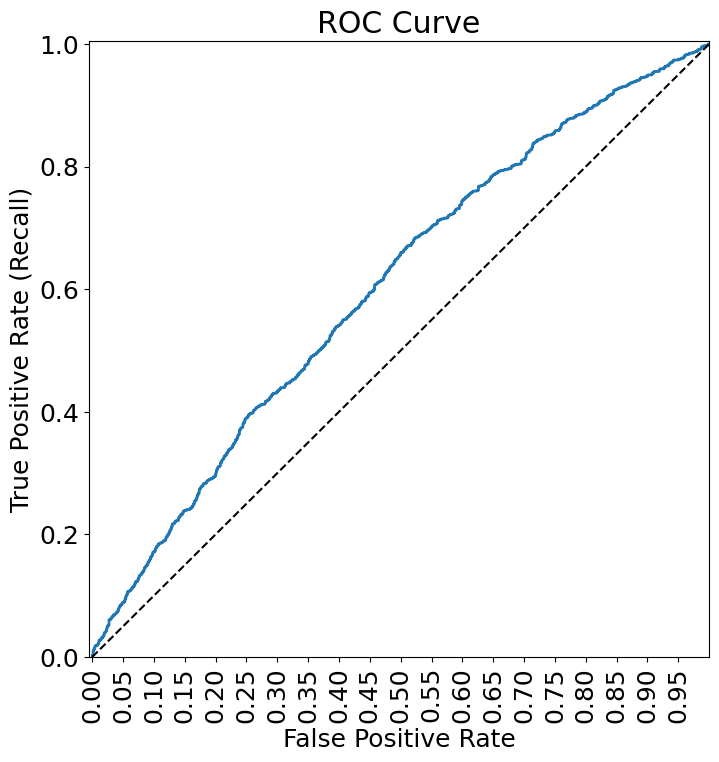

In [334]:
from sklearn.metrics import roc_curve, auc
y=train.profit_binary
ypred = logistic_model.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

In [335]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 57.0%
Precision = 58.8%
TPR or Recall = 68.8%
FNR = 31.2%
FPR = 56.8%
ROC-AUC = 59.4%


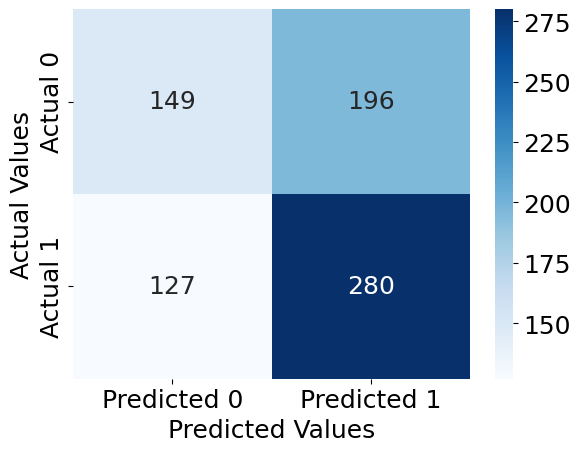

In [336]:
confusion_matrix_data(test,test.profit_binary,logistic_model,0.5)

The model's precision decreases when taking the multicollinearity into account. Without the cast profitability variables and taking into account multicollinearity + using backwards selection, we achieve a precision of 58.8%, which is not much higher than the original 57.2%.